Классификация на датасете [Parkinsons] https://archive.ics.uci.edu/ml/datasets/parkinsons. Он состоит из ряда биомедицинских измерений голоса 31 человека, 23 из которых страдают болезнью Паркинсона. Каждый столбец в таблице представляет собой конкретный показатель голоса, а каждая строка соответствует одной из 195 записей голоса пациентов.
Датасет имеет 23 биологических измерения голоса:

    1 -- name - id пациент-запись;
    2 -- MDVP:Fo(Hz) - Средняя основная частота вокала;
    3 -- MDVP:Fhi(Hz) - Максимальная основная частота вокала;
    4 -- MDVP:Flo(Hz) - Минимальная основная частота вокала;
    5-9 -- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Несколько показателей изменения основной частоты;
    10-16 -- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Несколько показателей вариации амплитуды;
    17-18 -- NHR, HNR - Две меры отношения шума к тональным компонентам в голосе;
    20-21 -- RPDE, D2 - Две нелинейные меры динамической сложности;
    22 -- DFA - экспонента масштабирования фрактала сигнала;
    23-25 -- spread1, spread2, PPE - три нелинейные меры изменения основной частоты.

Статус

    19 -- status - Состояние здоровья субъекта (единица) - болезнь Паркинсона, (ноль) - здоров.



In [3]:
# Импортируем наши стандартные библиотеки
from copy import deepcopy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

### Подготовка данных

In [4]:
!pip install gdown

In [5]:
# Команда gdown для скачивания файла по ID
# file_id = 13iZSrbgIzYemEQiRqLWUsOpDeTiEpsU9
! gdown https://drive.google.com/uc?id=13iZSrbgIzYemEQiRqLWUsOpDeTiEpsU9

Downloading...
From: https://drive.google.com/uc?id=13iZSrbgIzYemEQiRqLWUsOpDeTiEpsU9
To: /content/parkinsons.csv
100% 1.79M/1.79M [00:00<00:00, 123MB/s]


In [6]:
df = pd.read_csv("parkinsons.csv")
df.sample(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,name
2128,147.210363,252.370191,113.738859,0.005722,0.000033,0.002774,0.003561,0.008305,0.034837,0.356315,...,0.016959,19.611821,0.575778,0.686846,-5.058770,0.297273,2.660984,0.234306,1.0,2128
3863,129.051825,205.369320,72.112257,0.010312,0.000078,0.005317,0.006733,0.015956,0.052872,0.524277,...,0.050070,17.698407,0.489257,0.790415,-4.671477,0.312469,2.635955,0.308910,0.0,3863
2628,152.716501,241.537812,85.044020,0.006657,0.000045,0.003493,0.003842,0.010507,0.047328,0.431331,...,0.047352,19.875080,0.499402,0.728139,-5.733736,0.283153,2.675798,0.217646,1.0,2628
999,211.121072,247.720663,158.890943,0.004122,0.000015,0.002398,0.002287,0.007178,0.016830,0.154599,...,0.011495,26.471899,0.473493,0.721438,-7.373918,0.171477,2.035566,0.085022,0.0,999
626,216.746344,237.913112,154.494380,0.004530,0.000020,0.002264,0.002169,0.006773,0.019298,0.179250,...,0.013865,22.817055,0.412564,0.667925,-6.672055,0.176674,2.281800,0.117383,0.0,626
699,226.667026,263.547057,202.116671,0.003691,0.000013,0.002121,0.002027,0.006373,0.018732,0.180040,...,0.017055,21.543435,0.397605,0.642246,-7.102585,0.081846,2.078354,0.106450,0.0,699
2671,147.708509,253.583653,66.931109,0.007638,0.000048,0.004339,0.003827,0.013025,0.040721,0.421715,...,0.032524,20.446374,0.517993,0.696044,-5.032926,0.220713,2.273636,0.232975,1.0,2671
2175,174.999327,228.471202,131.626893,0.002167,0.000007,0.000869,0.001350,0.002613,0.012178,0.136371,...,-0.002100,24.124615,0.338409,0.739377,-6.477195,0.199388,2.641002,0.148064,1.0,2175
239,124.457999,219.270175,118.878472,0.003210,0.000029,0.001311,0.001841,0.003930,0.014751,0.124758,...,-0.003514,24.041059,0.588684,0.671184,-5.776568,0.134605,2.346044,0.187910,0.0,239
1216,125.298364,113.204835,125.376657,0.009100,0.000064,0.004471,0.005589,0.013415,0.040372,0.392582,...,0.029950,20.294919,0.586659,0.780296,-4.263039,0.256108,2.115735,0.329105,1.0,1216


In [7]:
# Пропуски типы данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       4000 non-null   float64
 1   MDVP:Fhi(Hz)      4000 non-null   float64
 2   MDVP:Flo(Hz)      4000 non-null   float64
 3   MDVP:Jitter(%)    4000 non-null   float64
 4   MDVP:Jitter(Abs)  4000 non-null   float64
 5   MDVP:RAP          4000 non-null   float64
 6   MDVP:PPQ          4000 non-null   float64
 7   Jitter:DDP        4000 non-null   float64
 8   MDVP:Shimmer      4000 non-null   float64
 9   MDVP:Shimmer(dB)  4000 non-null   float64
 10  Shimmer:APQ3      4000 non-null   float64
 11  Shimmer:APQ5      4000 non-null   float64
 12  MDVP:APQ          4000 non-null   float64
 13  Shimmer:DDA       4000 non-null   float64
 14  NHR               4000 non-null   float64
 15  HNR               4000 non-null   float64
 16  RPDE              4000 non-null   float64


In [8]:
# Статистики каждого признака
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,name
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,154.066451,196.497430,116.430862,0.006147,0.000043,0.003261,0.003412,0.009784,0.029549,0.280437,...,0.024310,21.882981,0.499643,0.718363,-5.701410,0.226435,2.375166,0.205393,0.701250,1999.500000
std,31.684268,64.826518,33.434512,0.003534,0.000026,0.002154,0.002029,0.006462,0.014124,0.145843,...,0.028795,3.331937,0.076340,0.039846,0.883783,0.063590,0.284840,0.071868,0.457767,1154.844867
min,64.845446,3.810054,29.313386,-0.002290,-0.000013,-0.001959,-0.001997,-0.005887,-0.006255,-0.097950,...,-0.042461,10.734641,0.245591,0.596168,-8.098224,0.033613,1.427841,0.031184,0.000000,0.000000
25%,132.597006,153.271882,93.782711,0.003697,0.000025,0.001788,0.001970,0.005361,0.018477,0.169647,...,0.005831,19.725926,0.446157,0.690808,-6.361474,0.181697,2.177314,0.148182,0.000000,999.750000
50%,149.769369,189.146050,110.711593,0.005540,0.000040,0.002865,0.003031,0.008594,0.027119,0.254111,...,0.019541,22.005644,0.500779,0.717595,-5.652116,0.226965,2.361430,0.206103,1.000000,1999.500000
75%,171.528004,230.131756,132.531355,0.007947,0.000058,0.004341,0.004454,0.013005,0.038345,0.364116,...,0.037823,24.166649,0.554109,0.746250,-5.071574,0.270018,2.567220,0.255103,1.000000,2999.250000
max,311.480923,543.607861,271.022682,0.024855,0.000185,0.015691,0.014328,0.047060,0.091909,0.910901,...,0.209710,32.739197,0.741927,0.835685,-2.852659,0.425241,3.573618,0.464673,1.000000,3999.000000


In [9]:
# Посмотрим на соотношение классов в данных

print(f"В датасете {len(df)} объектов")
print(f"В данных {sum(df.status == 0)} объектов класса 0")
print(f"В данных {sum(df.status == 1)} объектов класса 1")

В датасете 4000 объектов
В данных 1195 объектов класса 0
В данных 2805 объектов класса 1


Видим необычный датасет -- в нем доминирует таргетный класс.
Поэтому нам надо быть осторожными при подсчете метрик, поскольку распределение классов в жизни будет диаметрально противоположным!

Один из вариантов решения -- инвертировать классы, но в данном случае, мы будем просто аккуратны в подсчете метрик -- нам важно, чтобы нулевой класс был почти полностью распознан верно.

Построим baseline модель, проведем простой отбор признаков.

In [10]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [11]:
import sklearn
print(sklearn.__version__)

1.3.2


In [12]:
from sklearn.metrics import classification_report#считает все популярные метрики классификации
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay  #отслеживать ошибки на каждый класс

In [13]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [14]:
# Разделим данные на признаки и таргет не забыв удалить столбце с id

X = df.drop(columns=["status", "name"])
y = df["status"]

In [15]:
# Разобьем данные на обучение и тест при помощи функции train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=13)

### Обучим baseline модель

## Бустинги с параметрами по умолчанию

In [16]:
# Установим catboost

!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [17]:
# Импортируем CatBoost и LightGBM
import catboost as cb
import lightgbm as lgb
import warnings
# Отключение предупреждений
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


In [18]:
# Создадим экземпляры классов бустингов-классификаторо (CatBoostClassifier и LGBMClassifier)

CB_model = cb.CatBoostClassifier(verbose=0)
LGB_model = lgb.LGBMClassifier(verbose=0)

CB_model.fit(X_train, y_train)
LGB_model.fit(X_train, y_train)

LGBMClassifier(verbose=0)

TEST
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.77       239
         1.0       0.89      0.93      0.91       561

    accuracy                           0.87       800
   macro avg       0.85      0.83      0.84       800
weighted avg       0.87      0.87      0.87       800

TRAIN
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       956
         1.0       0.99      1.00      0.99      2244

    accuracy                           0.99      3200
   macro avg       0.99      0.98      0.99      3200
weighted avg       0.99      0.99      0.99      3200



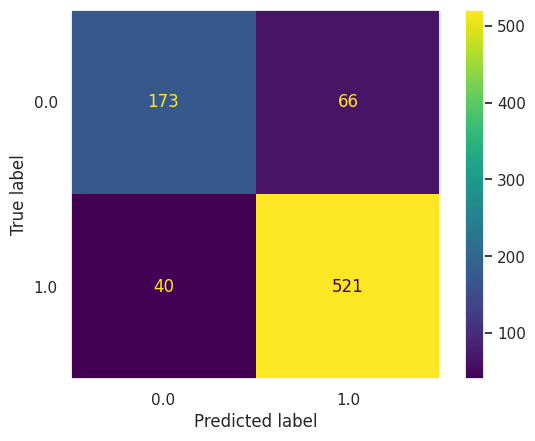

In [19]:
# Посмотрим как с работой справился LGBM

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test, LGB_model.predict(X_test)))
print("TRAIN")
print(classification_report(y_train, LGB_model.predict(X_train)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
conf_matrix=confusion_matrix(y_test,LGB_model.predict(X_test))#=confusion_matrix(LGB_model, X_test, y_test)
class_labels = LGB_model.classes_
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=[class_labels[0],class_labels[1]])
disp.plot()#cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

TEST
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       239
         1.0       0.88      0.94      0.91       561

    accuracy                           0.87       800
   macro avg       0.86      0.83      0.84       800
weighted avg       0.87      0.87      0.87       800

TRAIN
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89       956
         1.0       0.93      0.98      0.96      2244

    accuracy                           0.94      3200
   macro avg       0.94      0.91      0.92      3200
weighted avg       0.94      0.94      0.94      3200



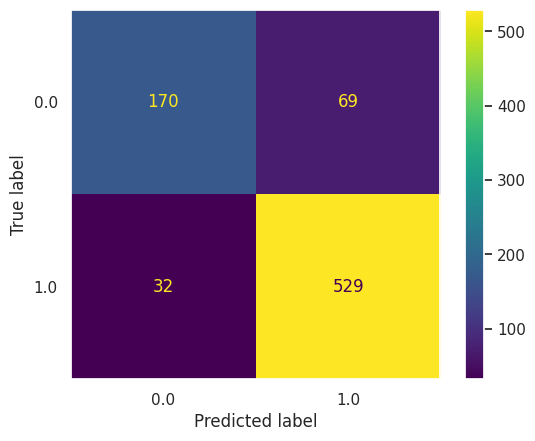

In [20]:
# Посмотрим как с работой справился CatBoost

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test, CB_model.predict(X_test)))
print("TRAIN")
print(classification_report(y_train, CB_model.predict(X_train)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
conf_matrix=confusion_matrix(y_test,CB_model.predict(X_test))#=confusion_matrix(LGB_model, X_test, y_test)
class_labels = LGB_model.classes_
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=class_labels)#[1],class_labels[0]])
disp.plot()#cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## Оба алгоритма хорошо справились, но судя по метрикам на обучении -- бустинги переобучились

In [21]:
# Посмотрим какие признаки какой бустинг выбрал важными при помощи метода feature_importances_
# Чтобы понять какому признаку какой вес соответствует, мы соединим названия признаков и feature_importances при помощи функции zip
# Кроме того отсортируем их по важности

print(f"Важность признаков в LGBM: {sorted(zip(X_train.columns, LGB_model.feature_importances_), key=lambda x: -x[1])}")
print(f"Важность признаков в CatB: {sorted(zip(X_train.columns, CB_model.feature_importances_), key=lambda x: -x[1])}")

Важность признаков в LGBM: [('MDVPFloHz', 218), ('HNR', 214), ('spread2', 209), ('MDVPAPQ', 194), ('spread1', 193), ('RPDE', 180), ('NHR', 161), ('DFA', 160), ('PPE', 155), ('MDVPFhiHz', 147), ('MDVPFoHz', 141), ('MDVPPPQ', 138), ('D2', 127), ('MDVPJitterAbs', 122), ('MDVPRAP', 111), ('ShimmerAPQ3', 106), ('MDVPShimmer', 104), ('ShimmerAPQ5', 104), ('MDVPJitter', 84), ('MDVPShimmerdB', 75), ('JitterDDP', 38), ('ShimmerDDA', 19)]
Важность признаков в CatB: [('spread1', 9.549684957500666), ('MDVPFloHz', 8.161351479272943), ('spread2', 7.225157902670086), ('MDVPAPQ', 7.15795519149575), ('PPE', 6.853579102170101), ('NHR', 5.988414108050262), ('DFA', 4.920428726904642), ('MDVPFoHz', 4.830613552346698), ('RPDE', 4.732779400780111), ('MDVPPPQ', 4.611114026554469), ('HNR', 4.575815063314581), ('MDVPFhiHz', 4.084576888698187), ('MDVPJitterAbs', 3.6459979272767518), ('D2', 3.546519246381408), ('ShimmerAPQ5', 3.1047083617654097), ('MDVPRAP', 2.8061874278896046), ('MDVPShimmer', 2.601164381708798)

In [22]:
# Выберем все признаки, которые для LGBM имели важность больше 1 и для CatBoost важность больше 2
# Так отбирать признаки стоит только если хотите отсеять совсем шумовые -- не стоит с этим увлекаться

LGBM_cols = X_train.columns[LGB_model.feature_importances_ > 1]
CB_cols = X_train.columns[CB_model.feature_importances_ > 2]

selected_features = list(set(LGBM_cols) & set(CB_cols))
print(selected_features)

['PPE', 'D2', 'spread2', 'MDVPPPQ', 'ShimmerAPQ3', 'MDVPJitterAbs', 'RPDE', 'MDVPShimmer', 'MDVPFoHz', 'NHR', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA', 'MDVPRAP', 'spread1', 'MDVPJitter', 'DFA', 'MDVPFloHz', 'MDVPFhiHz', 'JitterDDP', 'MDVPShimmerdB', 'HNR']


In [23]:
# Выберем только эти признаки у обучающего и тестового датасетов

X_test = X_test[selected_features]
X_train = X_train[selected_features]

### Подбор параметров

Для поиска оптимальных параметров, мы воспользуем `RandomizedSearchCV`, поскольку, как вы уже заметили, даже на маленьком датасете бустинги считаются достаточно долго.

У бустингов есть два основных параметра с которых стоит начинать настройку -- `learning_rate`/`lr` и `max_depth`. Параметр `n_estimators` (число деревьев) также стараются зафиксировать на достаточном уровне -- поскольку у нас мало данных, этот параметр вы оставим без изменения)

In [24]:
# Импортируем RandomizedSearchCV из модуля model_selection библиотеки sklearn
from sklearn.model_selection import RandomizedSearchCV

In [25]:
%%time

# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

grid_LGBM = RandomizedSearchCV(
            lgb.LGBMClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 0,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM.fit(X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1')

In [26]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM.best_score_}")
print(f"Лучшие параметры: {grid_LGBM.best_params_}")

Лучшая метрика:   0.9235321834876465
Лучшие параметры: {'max_depth': 4, 'learning_rate': 0.1610707070707071}


TEST
              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       239
         1.0       0.88      0.93      0.91       561

    accuracy                           0.87       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.86      0.87      0.86       800

TRAIN
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       956
         1.0       0.93      0.98      0.96      2244

    accuracy                           0.94      3200
   macro avg       0.94      0.90      0.92      3200
weighted avg       0.94      0.94      0.93      3200



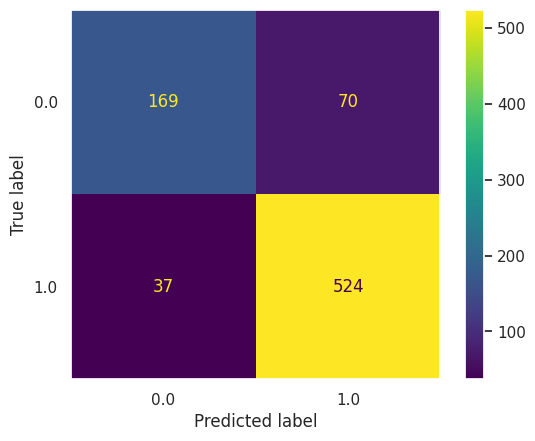

In [27]:
# Посмотрим как с работой теперь справится LGBM

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test, grid_LGBM.best_estimator_.predict(X_test)))
print("TRAIN")
print(classification_report(y_train, grid_LGBM.best_estimator_.predict(X_train)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
conf_matrix=confusion_matrix(y_test,grid_LGBM.best_estimator_.predict(X_test))#=confusion_matrix(LGB_model, X_test, y_test)
class_labels = grid_LGBM.classes_
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=class_labels)#[1],class_labels[0]])
disp.plot()
#conf_matrix=confusion_matrix(grid_LGBM.best_estimator_(X_test), y_test)
plt.grid(False)
plt.show()

In [28]:
%%time

# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

grid_CB = RandomizedSearchCV(
            cb.CatBoostClassifier(verbose=0),       # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_CB.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 13.3 s, sys: 873 ms, total: 14.1 s
Wall time: 2min 53s


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7aaf74f99570>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1', verbose=5)

Видно, что `CatBoost` работает в разы медленнее, однако он сходится быстрее, чем `LGBM` и потому суммарное время работы для нахождения оптимума у них примерно одинаковое

In [29]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid_CB.best_score_}")
print(f"Лучшие параметры: {grid_CB.best_params_}")

# Метрика выше!

Лучшая метрика:   0.926890640412021
Лучшие параметры: {'max_depth': 6, 'learning_rate': 0.03422222222222222}


TEST
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.79       239
         1.0       0.89      0.95      0.92       561

    accuracy                           0.88       800
   macro avg       0.88      0.84      0.85       800
weighted avg       0.88      0.88      0.88       800

TRAIN
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       956
         1.0       0.98      1.00      0.99      2244

    accuracy                           0.98      3200
   macro avg       0.99      0.97      0.98      3200
weighted avg       0.98      0.98      0.98      3200



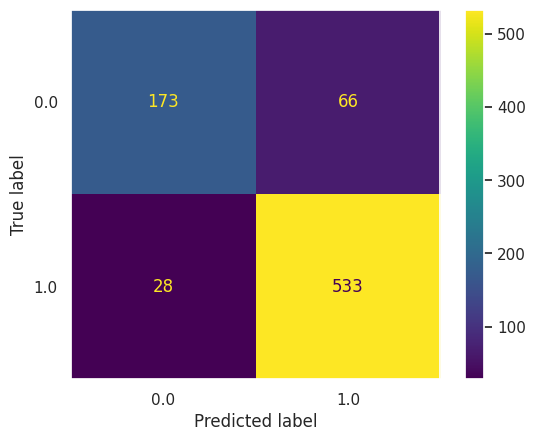

In [30]:
# Посмотрим как с работой теперь справиться CB

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test, grid_CB.best_estimator_.predict(X_test)))
print("TRAIN")
print(classification_report(y_train, grid_CB.best_estimator_.predict(X_train)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
conf_matrix=confusion_matrix(y_test,grid_CB.best_estimator_.predict(X_test))
class_labels=grid_CB.classes_
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=class_labels)
disp.plot()
plt.grid(False)
plt.show()

Видим, что подбор параметров не дал прироста в качестве. Но ничего, такое тоже бывает, тогда давайте построим графики и составим отчет.

### Визуализация

In [31]:
# Отоберем еще признаки при помощи permutation importance, для перестановки признаков и оценки важности для качества
# импортируем эту функцию из модуля inspection sklearn

from sklearn.inspection import permutation_importance

In [32]:
%%time
# Воспользуемся поиском важности перемешиванием, для лучшей модели LGBM

result_LGBM = permutation_importance(grid_LGBM.best_estimator_, X_test, y_test,
                                     n_repeats=30,
                                     random_state=0)

# Воспользуемся поиском важности перемешиванием, для лучшей модели CatBoost

result_CB = permutation_importance(grid_CB.best_estimator_, X_test, y_test,
                                     n_repeats=30,
                                     random_state=0)

CPU times: user 6.42 s, sys: 332 ms, total: 6.75 s
Wall time: 5.95 s


In [33]:
# Посмотрим, что возвращает эта функция

result_LGBM

{'importances_mean': array([0.00591667, 0.00645833, 0.01483333, 0.00979167, 0.005     ,
        0.00404167, 0.00458333, 0.01341667, 0.00308333, 0.00520833,
        0.00029167, 0.02625   , 0.0005    , 0.00191667, 0.10475   ,
        0.00258333, 0.005     , 0.00758333, 0.00220833, 0.011125  ,
        0.00579167, 0.01108333]),
 'importances_std': array([0.00362189, 0.0033863 , 0.00457271, 0.00399327, 0.00317871,
        0.00265525, 0.00231241, 0.00517338, 0.00305732, 0.00425837,
        0.00261572, 0.00475438, 0.00142887, 0.00220637, 0.00915378,
        0.00297443, 0.00176777, 0.00312805, 0.00288103, 0.00354069,
        0.00231578, 0.00280872]),
 'importances': array([[ 0.00625,  0.00375,  0.00125,  0.00375,  0.0025 ,  0.0075 ,
          0.00875,  0.01125,  0.00125,  0.0025 ,  0.01   ,  0.00375,
          0.01125,  0.0125 ,  0.005  ,  0.00875,  0.01   ,  0.0025 ,
          0.01125,  0.0075 ,  0.0025 ,  0.005  ,  0.0125 ,  0.00375,
          0.0075 ,  0.00375,  0.00125,  0.005  ,  0.00125,

In [34]:
# Оставим только те признаки, которые дают положительный вклад (то есть importances_mean > 0) хотя бы для одной модели

X_test.columns[(result_LGBM['importances_mean'] > 0) | (result_CB['importances_mean'] > 0)]

Index(['PPE', 'D2', 'spread2', 'MDVPPPQ', 'ShimmerAPQ3', 'MDVPJitterAbs',
       'RPDE', 'MDVPShimmer', 'MDVPFoHz', 'NHR', 'ShimmerAPQ5', 'MDVPAPQ',
       'ShimmerDDA', 'MDVPRAP', 'spread1', 'MDVPJitter', 'DFA', 'MDVPFloHz',
       'MDVPFhiHz', 'JitterDDP', 'MDVPShimmerdB', 'HNR'],
      dtype='object')

Отберем лучшие признаки и прогоним  через catboosting лучший набор.

In [50]:
# Сохраним лучшие признаки

Вest_feat_train = X_train.columns[(result_CB['importances_mean'] > 0)]

In [51]:
Вest_feat_train_df=X_train.loc[:,Вest_feat_train]

In [48]:
grid_CB.best_params_

{'max_depth': 6, 'learning_rate': 0.03422222222222222}

## Посмотрим метрики отобранных лучших призанаков на test -

TEST
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.79       239
         1.0       0.89      0.95      0.92       561

    accuracy                           0.88       800
   macro avg       0.88      0.84      0.85       800
weighted avg       0.88      0.88      0.88       800



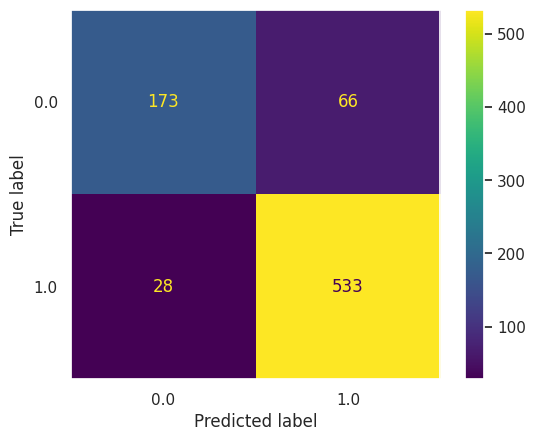

In [53]:
CB_model_new = cb.CatBoostClassifier(max_depth=6,learning_rate= 0.034222, verbose=0)
CB_model_new.fit(Вest_feat_train_df, y_train)
# Предсказание на тестовом наборе
predictions_new = CB_model_new.predict(X_test)
# Вывод отчета классификации и построение матрицы ошибок
print("TEST")
print(classification_report(y_test, predictions_new))
conf_matrix = confusion_matrix(y_test, predictions_new)
class_labels = CB_model_new.classes_
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels)
disp.plot()
plt.grid(False)
plt.show()

### Отчет о работе модели (при помощи SHAP)

In [ ]:
# Установим библиотеку shap
! pip install shap

In [56]:
# Импортируем библиотек shap
import shap

In [57]:
# Создадим объект библиотеки shap -- explainer при помощи функции TreeExplainer библиотеки shap, который принимает модель
# например для лучше модели LGBM
explainer = shap.TreeExplainer(grid_LGBM.best_estimator_)

In [58]:
# Посчитаем shap-values вызвав у explainer метод shap_values, передав в качестве аргумента датасет X_train

shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


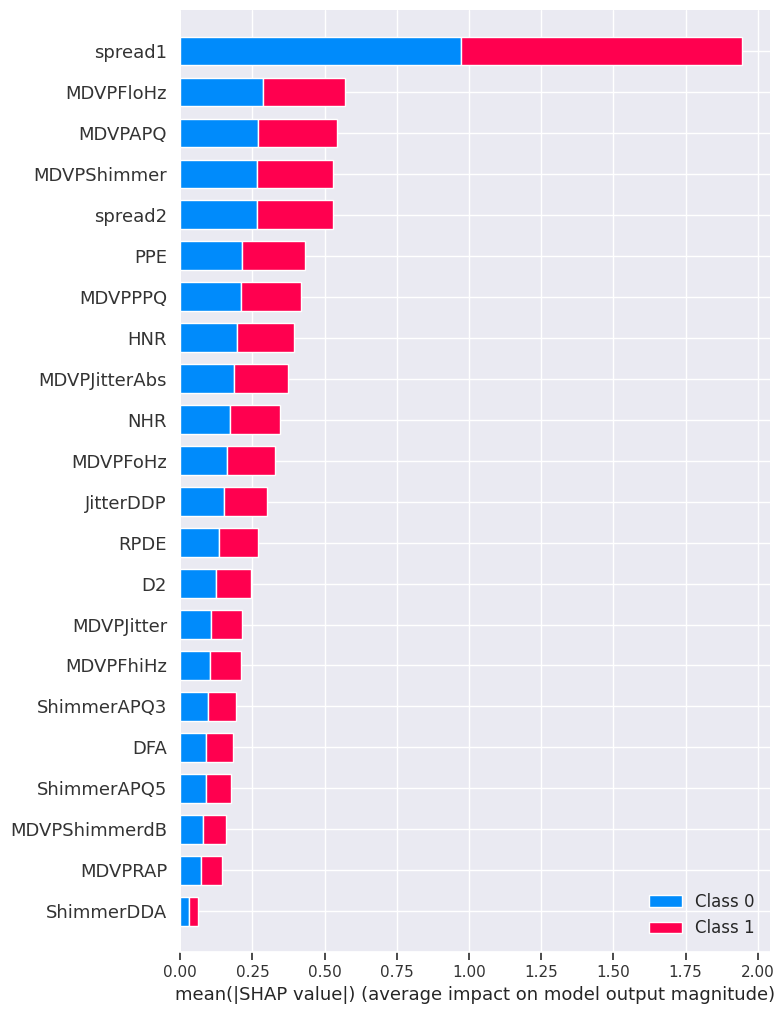

In [59]:
# Посторим график важности фичей, вызвав summary_plot из библиотеки shap

shap.summary_plot(shap_values, X_train, max_display=25)

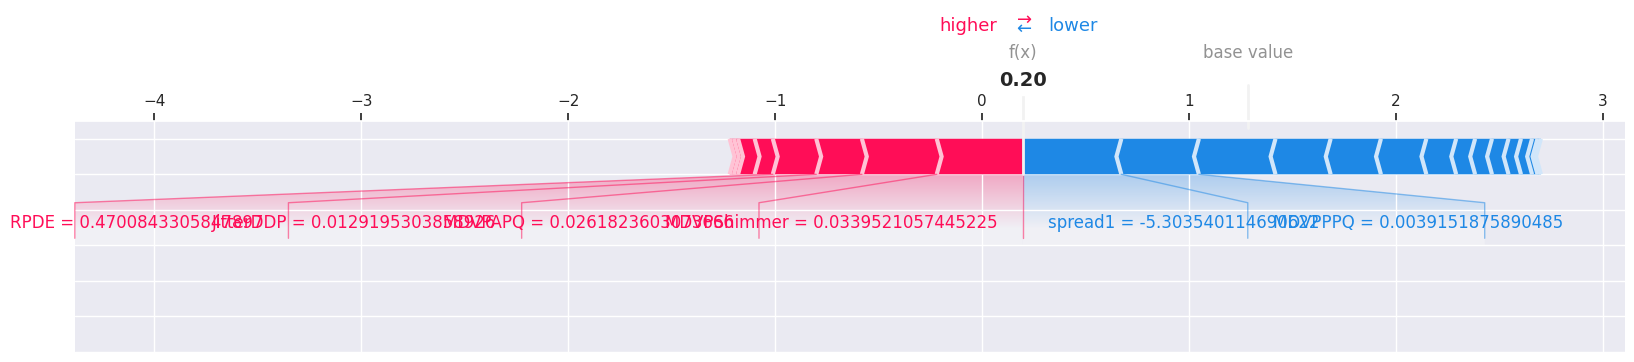

In [60]:
# Можем посмотреть на влияние для одного
shap.force_plot(explainer.expected_value[1], shap_values[0][0], X_test.iloc[[0]], matplotlib = True)

In [61]:
# Давайте посмотрим на тех, на ком наш алгоритм ошибся
# Например при помощи функции np.where, где будут сравнивать предсказания и метки

error_index = np.where(y_test != grid_LGBM.best_estimator_.predict(X_test))[0]
print(error_index)

[  9  17  22  24  29  41  45  48  59  65  69  73  78  83 105 122 131 137
 144 145 151 165 173 179 192 195 200 207 215 216 228 232 244 253 264 268
 276 291 308 311 326 339 353 363 368 372 376 378 395 402 403 411 416 447
 457 468 469 471 491 499 500 508 511 524 532 534 539 546 549 554 557 568
 577 578 579 580 581 585 607 609 615 616 617 620 621 622 633 645 646 647
 648 651 655 657 670 671 678 687 711 725 730 734 751 763 789 790 797]


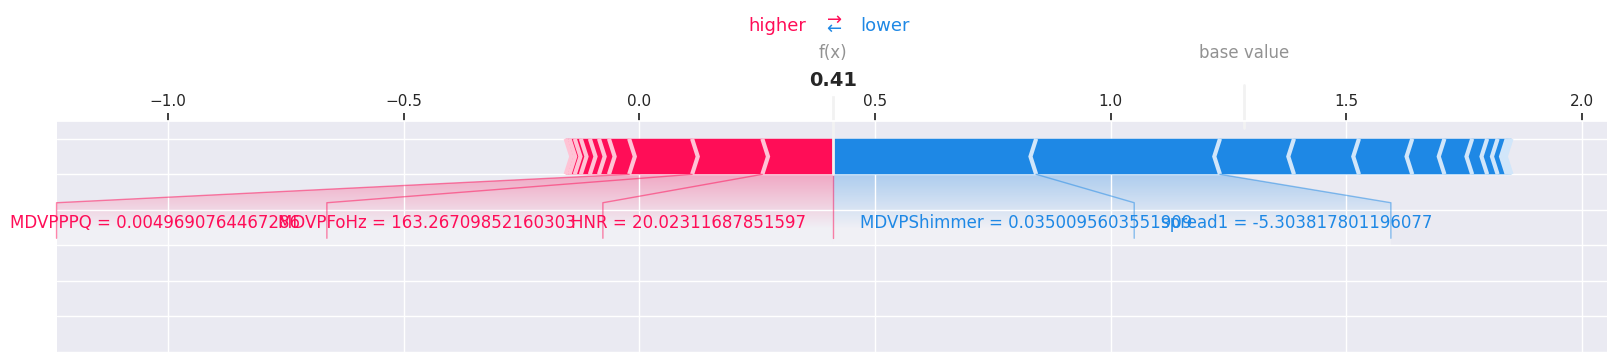

In [63]:
# Можем посмотреть на влияние для одного
shap.force_plot(explainer.expected_value[1], shap_values[0][14], X_test.iloc[[14]], matplotlib = True)